In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Exploratory Data Analysis (EDA)

In [73]:
SM_data = pd.read_csv(r"C:\Users\lenovo\Documents\assignments\podcast_dataset.csv")
SM_data

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380
4,Humor Hub,Episode 73,83.48,Comedy,76.69,Tuesday,Afternoon,42.31,3,Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52495,Home & Living,Episode 17,24.81,Lifestyle,66.15,Monday,Evening,98.63,1,Neutral,20.573795
52496,Melody Mix,Episode 9,92.15,Music,89.61,Saturday,Night,25.82,2,Negative,76.198459
52497,Comedy Corner,Episode 24,112.27,Comedy,26.33,Saturday,Night,55.29,0,Neutral,107.602135
52498,Business Briefs,Episode 85,NaN,Business,41.47,Wednesday,Afternoon,33.58,0,Neutral,17.220998


In [74]:
SM_data['Episode_Sentiment'] = SM_data['Episode_Sentiment'].map({'Negative':-1, 'Neutral':0, 'Positive':1}) # Encoding
SM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 52500 non-null  object 
 1   Episode_Title                52500 non-null  object 
 2   Episode_Length_minutes       47254 non-null  float64
 3   Genre                        52500 non-null  object 
 4   Host_Popularity_percentage   52500 non-null  float64
 5   Publication_Day              52500 non-null  object 
 6   Publication_Time             52500 non-null  object 
 7   Guest_Popularity_percentage  47242 non-null  float64
 8   Number_of_Ads                52500 non-null  int64  
 9   Episode_Sentiment            52500 non-null  int64  
 10  Listening_Time_minutes       47105 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 4.4+ MB


In [75]:
null_rows = SM_data.isnull().any(axis=1).sum()
print(f"Rows with at least one null: {null_rows}")
SM_data[SM_data.isnull().any(axis=1)]

Rows with at least one null: 14337


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
4,Humor Hub,Episode 73,83.48,Comedy,76.69,Tuesday,Afternoon,42.31,3,1,NaN
5,Money Matters,Episode 87,28.06,Business,22.02,Wednesday,Morning,NaN,1,0,13.913024
10,Joke Junction,Episode 68,34.97,Comedy,50.32,Thursday,Morning,48.35,0,-1,NaN
22,Digital Digest,Episode 48,85.64,Technology,21.79,Saturday,Night,NaN,2,0,81.213415
23,Learning Lab,Episode 18,NaN,Education,66.84,Sunday,Night,45.12,2,1,90.800000
...,...,...,...,...,...,...,...,...,...,...,...
52474,News Roundup,Episode 66,44.52,News,94.28,Sunday,Afternoon,4.15,1,1,NaN
52476,Health Hour,Episode 16,99.19,Health,32.37,Saturday,Evening,97.01,2,1,NaN
52491,Sport Spot,Episode 86,29.47,Sports,48.71,Sunday,Morning,NaN,3,0,6.819700
52493,Brain Boost,Episode 71,72.87,Education,21.36,Tuesday,Morning,NaN,0,-1,52.430865


In [76]:
SM_data.dropna(inplace=True, axis=0)
SM_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38163 entries, 0 to 52499
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 38163 non-null  object 
 1   Episode_Title                38163 non-null  object 
 2   Episode_Length_minutes       38163 non-null  float64
 3   Genre                        38163 non-null  object 
 4   Host_Popularity_percentage   38163 non-null  float64
 5   Publication_Day              38163 non-null  object 
 6   Publication_Time             38163 non-null  object 
 7   Guest_Popularity_percentage  38163 non-null  float64
 8   Number_of_Ads                38163 non-null  int64  
 9   Episode_Sentiment            38163 non-null  int64  
 10  Listening_Time_minutes       38163 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.5+ MB


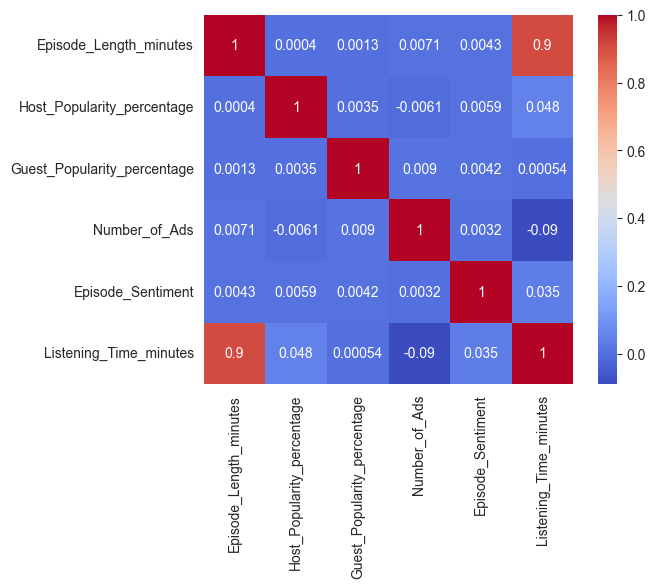

In [77]:
num_DM_data = SM_data.select_dtypes(include=["number"])
sns.heatmap(num_DM_data.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

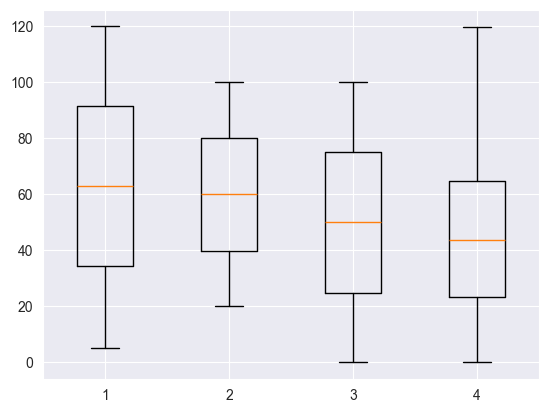

In [78]:
plt.boxplot(num_DM_data.drop(['Number_of_Ads', 'Episode_Sentiment'], axis=1))
plt.show()

# Preprocessing

In [79]:
x = num_DM_data.drop('Listening_Time_minutes', axis=1)
y = num_DM_data['Listening_Time_minutes']
x

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,99.25,21.37,70.22,3,1
1,19.43,47.19,75.15,1,0
2,117.03,96.33,57.95,3,0
3,16.97,25.73,24.19,0,1
6,63.77,58.84,82.20,0,1
...,...,...,...,...,...
52494,33.35,63.23,90.81,1,1
52495,24.81,66.15,98.63,1,0
52496,92.15,89.61,25.82,2,-1
52497,112.27,26.33,55.29,0,0


In [80]:
y

0         55.158695
1          7.686559
2        110.064645
3         12.000380
6         57.827346
            ...    
52494     32.133509
52495     20.573795
52496     76.198459
52497    107.602135
52499     52.102024
Name: Listening_Time_minutes, Length: 38163, dtype: float64

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Linear Regression (Simple)

In [82]:
reg = LinearRegression()
reg.fit(x_train[["Episode_Length_minutes"]], y_train)
print(f"The Equation is: Y = {reg.coef_[0]} X + {reg.intercept_}")

The Equation is: Y = 0.7375597732291853 X + -0.8422662802906089


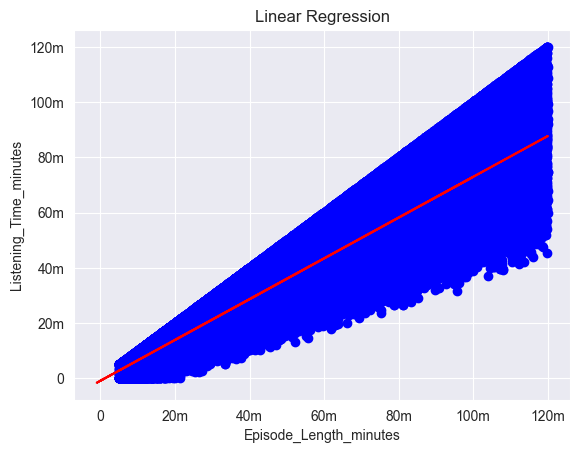

In [83]:
plt.scatter(x_train[["Episode_Length_minutes"]], y_train , color='blue')
plt.plot(x_train, reg.coef_[0]*x_train + reg.intercept_, '-r')
plt.xlabel('Episode_Length_minutes')
plt.ylabel('Listening_Time_minutes')
plt.title("Linear Regression")
plt.xticks([0,20,40,60,80,100,120], ['0','20m','40m','60m','80m','100m','120m'])
plt.yticks([0,20,40,60,80,100,120], ['0','20m','40m','60m','80m','100m','120m'])
plt.show()

In [84]:
y_hat = reg.predict(x_test[["Episode_Length_minutes"]])

In [85]:
r2 = r2_score(y_test, y_hat)
print(f"Model Accuracy (R² Score): {r2*100:.2f}%")

Model Accuracy (R² Score): 81.79%


In [86]:
mse = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 136.28


# Multiple Linear Regression

In [87]:
reg2 = LinearRegression()
reg2.fit(x_train, y_train)

eq = ""
for i in range(len(reg2.coef_)):
    if i==0:
        eq = eq + f"Y = {reg2.coef_[i]} X{i+1}"
    else :
        eq = eq + f" + {reg2.coef_[i]} X{i+1}"
eq = eq + f" + {reg2.intercept_}"

print(f"The Equation is: {eq}")

The Equation is: Y = 0.7378965687034528 X1 + 0.054869477036962086 X2 + -0.0007102827440342296 X3 + -2.319699532394259 X4 + 1.058041227267692 X5 + -0.6419203054863445


In [88]:
y_hat2 = reg2.predict(x_test)

In [89]:
r2_2 = r2_score(y_test, y_hat2)
print(f"Model Accuracy (R² Score): {r2_2*100:.2f}%")

Model Accuracy (R² Score): 83.04%


In [90]:
mse2 = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error: {mse2:.2f}")

Mean Squared Error: 136.28


The Multiple Linear Regression Model has higher r2 score.

# Polynomial Regression

In [91]:
Poly_reg = pd.read_csv(r"C:\Users\lenovo\Documents\assignments\diamonds.csv")

# Clean the data: Drop missing or duplicate rows
Poly_reg = Poly_reg.dropna().drop_duplicates()

# Convert columns to numeric
Poly_reg["price"] = pd.to_numeric(Poly_reg["price"], errors='coerce')
Poly_reg["log_price"] = pd.to_numeric(Poly_reg["log_price"], errors='coerce')
Poly_reg = Poly_reg.dropna(subset=["price", "log_price"])

Poly_reg

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.921898,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.921898,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.921898,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898,140.766120


In [92]:
# Feature matrix and target
X = Poly_reg["price"].values.reshape(-1, 1)
y = Poly_reg["log_price"].values

# Polynomial Regression
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [93]:
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Evaluation
mse3 = mean_squared_error(y, y_pred)
r2_3 = r2_score(y, y_pred)
accuracy_percent = r2_3 * 100

print(f"Mean Squared Error (degree={degree}): {mse3:.2f}")
print(f"Model Accuracy (R² Score): {accuracy_percent:.2f}%")

Mean Squared Error (degree=3): 0.02
Model Accuracy (R² Score): 98.24%


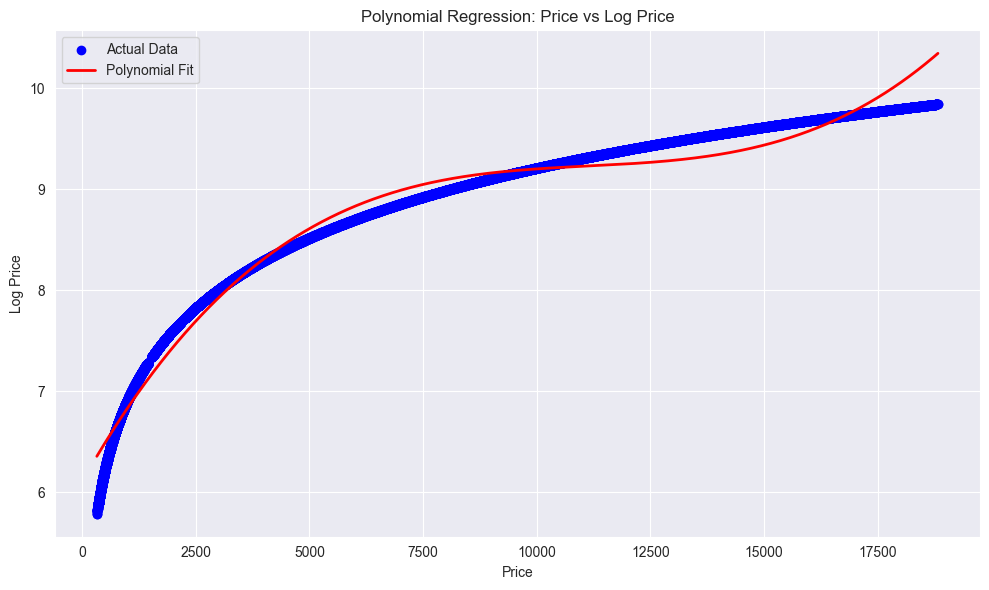

In [94]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
sorted_idx = np.argsort(X.flatten())
plt.plot(X[sorted_idx], y_pred[sorted_idx], color='red', linewidth=2, label='Polynomial Fit')
plt.title("Polynomial Regression: Price vs Log Price")
plt.xlabel("Price")
plt.ylabel("Log Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Logistic Regression with Classification

In [95]:
Log_reg=pd.read_csv(r"C:\Users\lenovo\Documents\assignments\INNHotelsGroup.csv")
Log_reg

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [96]:
Log_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [97]:
Log_reg.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [98]:
Log_reg.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [99]:
Log_reg.duplicated().sum()

np.int64(0)

In [100]:
#encoding
#label encoding to type_of_meal_plan
Log_reg['type_of_meal_plan']=Log_reg['type_of_meal_plan'].str.replace("Meal Plan", "")
Log_reg['type_of_meal_plan']=Log_reg['type_of_meal_plan'].str.replace("Not Selected", "0")
Log_reg['type_of_meal_plan']=Log_reg['type_of_meal_plan'].astype(int)
#label encoding to room_type_reserved
Log_reg['room_type_reserved']=Log_reg['room_type_reserved'].str.replace("Room_Type", "")
Log_reg['room_type_reserved']=Log_reg['room_type_reserved'].astype(int)
#label encoding to booking_status
encoder = LabelEncoder()
Log_reg['booking_status'] = encoder.fit_transform(Log_reg['booking_status'])
Log_reg['booking_status']=Log_reg['booking_status'].astype(int)
Log_reg['booking_status']= Log_reg['booking_status'] ^ 1
#label encoding to market_segment_type
encoder = LabelEncoder()
Log_reg['market_segment_type'] = encoder.fit_transform(Log_reg['market_segment_type'])
Log_reg['booking_status']=Log_reg['booking_status'].astype(int)
Log_reg

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,3,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,4,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,4,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,4,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,4,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,8,3,4,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,1,0,1,228,2018,10,17,4,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,1,0,1,148,2018,7,1,4,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,0,0,1,63,2018,4,21,4,0,0,0,94.50,0,1


In [101]:
#feature engineering
Log_reg['num_of_days_spend']= Log_reg['no_of_weekend_nights'] + Log_reg['no_of_week_nights']
Log_reg['total_peaple']= Log_reg['no_of_adults'] + Log_reg['no_of_children']

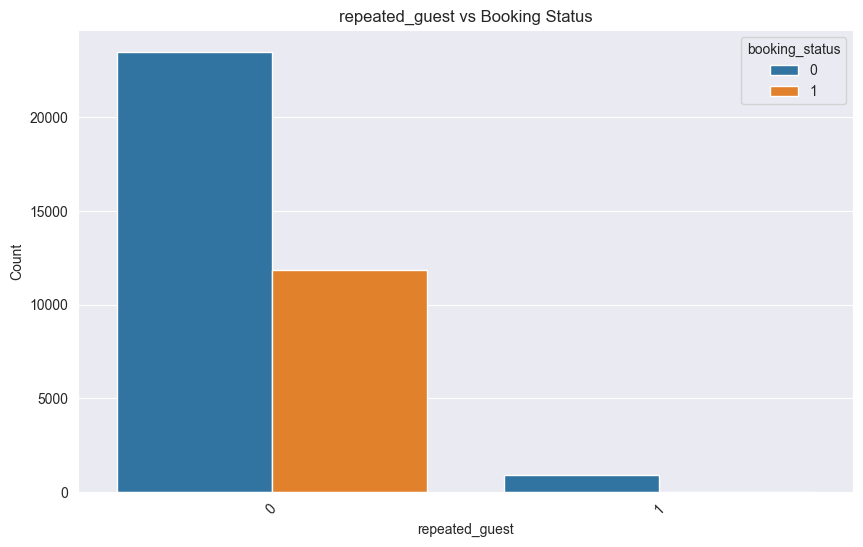

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Log_reg, x='repeated_guest', hue='booking_status')
plt.title('repeated_guest vs Booking Status')
plt.xlabel('repeated_guest')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

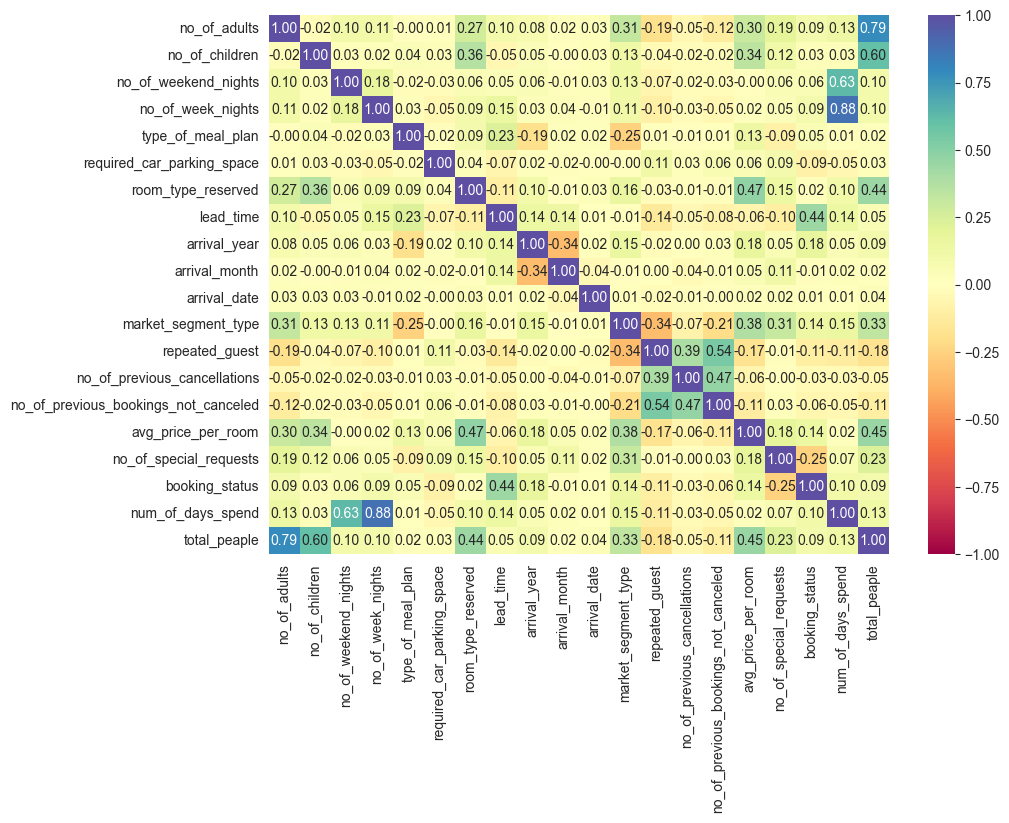

In [103]:
#heatmap to show relationship between features 
normacalCol=Log_reg.drop(['Booking_ID'], axis=1)
plt.figure(figsize=(10, 7))
sns.heatmap(
     normacalCol.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [104]:
#split data to train and test
x_data=normacalCol.drop(['booking_status'],axis=1)
y_data=Log_reg['booking_status']
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=42)

In [105]:
#fit data to make Logistic Regression
log=LogisticRegression()
log.fit(x_train,y_train)
#prediction
predict=log.predict(x_test)

C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


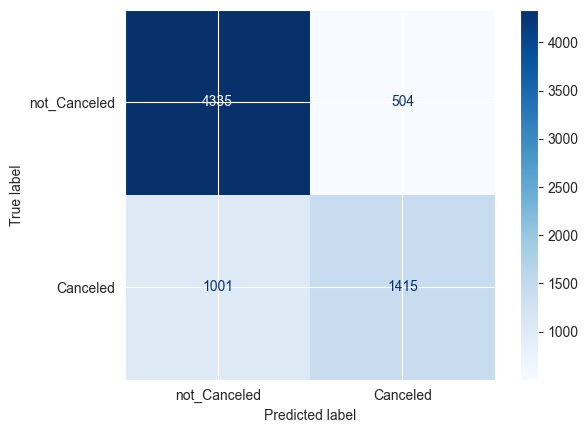

In [106]:
#confusion_matrix
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_Canceled', 'Canceled'])
disp.plot(cmap='Blues')

In [107]:
accuracy = accuracy_score(y_test,predict)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 79.26%
